#  GENOM PROJECT 2020-2021

## Kmer computation in phylogeny reconstruction
#### Alex Lence, Simon Chardin, Adrien Leroy

This project tries to implement various phylogeny reconstruction methodologies from K-Mer signatures using **kython**, a python package we devised for the occasion [Kython on Github](https://www.github.com/LeroyAdrien/Kython), [Kython on testPypi](https://test.pypi.org/project/kython/)

<img src='TOL_notebook.png' title="Tree from Archaeas and Bacterias">&nbsp;

##### This notebook shows:

* **Module pp**
    * **Downloading** Whole Genomes from **ncbi website** with Archea names list, Bacteria names list
    * Computing **K-mer signature** from an .fna file 
    * Computing **distance matrices** of all the files in a folder
    * Computing Phylogenetic tree from said distance matrix in **Newick Format** using **NJ algorithm**
    * Computing **Chi2 conformity** between subsamples of a genome to spot **horizontal transfers**
    
    
    
* **Module pl**
    * Plotting **K-mer signature** with custom matplotlib barplot
    * Plotting **Phylogenetic tree** in newick format using itools
    * Plotting **horizontal transfers** on genome with custom matplotlib

In [1]:
from kython import pp,pl
import matplotlib.pyplot as plt
import numpy as np
import random

### I-Downloading whole genomes from the ncbi website and retrieving the folder structure

We used a nested dictionnary to be able to retrieve phylums, organism names and genomin .fna file path



**Structure is the following:** $\color{black}{\text{Dictionnary}}$**\[**$\color{blue}{\text{Phylum}}$**\]\[**$\color{blue}{\text{Organism}}$**\]=**$\color{red}{\text{'Path to Genomic File'}}$

#### Setting up paths 

In [2]:
bacteriaListPath='../data/Bacteria.list'
archaeaListPath='../data/Archea.list'
resultsfolder='./refseq/'

#### Downloading files

In [ ]:
dictionnary=pp.DownloadSequences(bacteralistPath,archaeaListPath,'./')


Downloading: Bactéries


No downloads matched your filter. Please check your options.


Downloading: Acholeplasma laidlawii PG-8A
Downloading: Acidobacterium capsulatum ATCC 51196
Acidobacterium capsulatum ATCC 51196 was not found on NCBI'
Downloading: Akkermansia muciniphila ATCC BAA-835
Downloading: Alicyclobacillus acidocaldarius subsp. acidocaldarius DSM 446


### II-Retrieving organisms names linked to their .fna files

If you have already downloaded some files you can retrieve them directly by using ``` pp.ParseSequences(folder)```

In [4]:
pathDictionnary=pp.ParseSequences(resultsfolder)
pathTest=pathDictionnary['archaea']['Methanosarcina mazei Go1']

#### We retreived the following organisms:

In [ ]:
print("Bacterias:",'\n')
for bacteria in pathDictionnary['bacteria'].keys():
    print(bacteria)
print("\n")
for archaea in pathDictionnary['archaea'].keys():
    print(archaea)

### IIIa-Computing a K-mer signature from a genomic file

To compute a Kmer signature, we need to specify the size of said Kmer and if we want to normalize counts. <br>
$\color{red}{\text{Warning}}$: If the size of the Kmer is to high, memory issues can appear. We advise you to use Kmer size between **2 and 8 bases**

In [5]:
signatureExample=pp.KmerSignature(pathTest,3,False)

In [6]:
display(signatureExample)

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,164445,62969,92871,103563,58168,46190,27208,53014,83932,57138,...,34351,83152,78296,62872,49624,58467,83779,104245,69314,161803


### IIIb-Plotting the signature

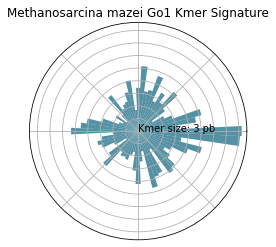

In [7]:
pl.KmerSignature(signatureExample,'Methanosarcina mazei Go1')

### IIIc-Conservation of the signature no matter the Kmer size

We can see here that the overall structure of the signature is globally conserved No matter the Kmer size, thanks to the polar aspect of the graph plotted here

$\color{red}{\text{Warning}}$: Due to the sheer number of possible Kmer combination for high Kmer size, plotting of signatures can get quite long when tu size of Kmer gets bigger (especially 7 and 8 pb long Kmers)


In [8]:
signatures=[pp.KmerSignature(pathTest,i,False) for i in range(1,9)]

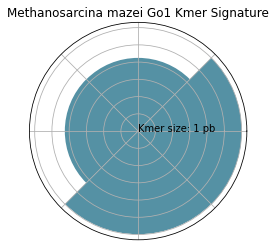

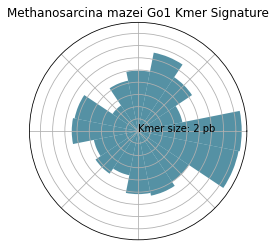

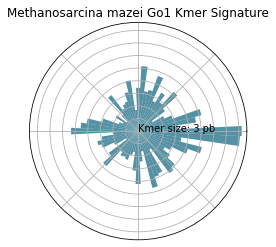

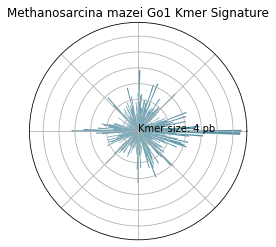

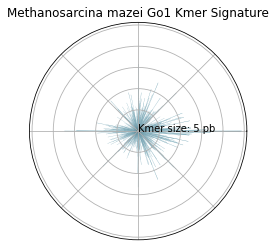

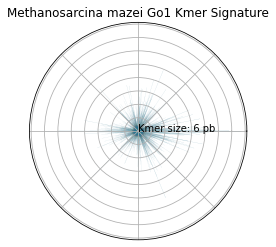

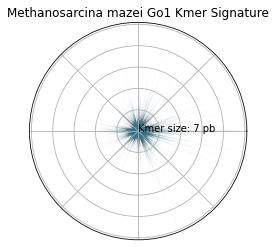

In [ ]:
for signature in signatures:
    pl.KmerSignature(signature,'Methanosarcina mazei Go1')

### IV-Computing a genetic distance matrix for all organisms in a folder

In [18]:
distanceMatrix=pp.DistanceMatrix(pathDictionnary,3)

bacteria Genome K-mer Computation : 1 / 98
bacteria Genome K-mer Computation : 2 / 98
bacteria Genome K-mer Computation : 3 / 98
bacteria Genome K-mer Computation : 4 / 98
bacteria Genome K-mer Computation : 5 / 98
bacteria Genome K-mer Computation : 6 / 98
bacteria Genome K-mer Computation : 7 / 98
bacteria Genome K-mer Computation : 8 / 98
bacteria Genome K-mer Computation : 9 / 98
bacteria Genome K-mer Computation : 10 / 98
bacteria Genome K-mer Computation : 11 / 98
bacteria Genome K-mer Computation : 12 / 98
bacteria Genome K-mer Computation : 13 / 98
bacteria Genome K-mer Computation : 14 / 98
bacteria Genome K-mer Computation : 15 / 98
bacteria Genome K-mer Computation : 16 / 98
bacteria Genome K-mer Computation : 17 / 98
bacteria Genome K-mer Computation : 18 / 98
bacteria Genome K-mer Computation : 19 / 98
bacteria Genome K-mer Computation : 20 / 98
bacteria Genome K-mer Computation : 21 / 98
bacteria Genome K-mer Computation : 22 / 98
bacteria Genome K-mer Computation : 23 / 

In [19]:
display(distanceMatrix)

,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 6119 chromosome CBM2610_a,Methylacidiphilum infernorum V4,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis SWF 66322,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8558 chromosome CBM2615_a,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3679,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis ip2.30/pp 2.30 chromosome CBM2623_a,Coxiella burnetii RSA 493,Campylobacter jejuni subsp. jejuni 81-176-UMCW7 plasmid pVir,Mycoplasma genitalium G37,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3521 chromosome CBM2589_a,...,Pyrococcus horikoshii OT3,Methanococcus vannielii SB,Methanosarcina mazei Go1,Thermococcus gammatolerans EJ3,Methanocella paludicola SANAE,Methanopyrus kandleri AV19,Methanococcus maripaludis C6,Haloterrigena turkmenica DSM 5511,Thermoplasma volcanium GSS1,Methanoculleus marisnigri JR1
Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 6119 chromosome CBM2610_a,0.000000,0.118075,0.001163,0.000453,0.002093,0.000891,0.117399,0.174554,0.167576,0.001050,...,0.131420,0.168540,0.127836,0.092034,0.070774,0.074277,0.158641,0.069523,0.129109,0.063176
Methylacidiphilum infernorum V4,0.118075,0.000000,0.117225,0.117799,0.116360,0.117815,0.037690,0.078279,0.072836,0.117501,...,0.037143,0.073244,0.030930,0.052532,0.061328,0.089055,0.061719,0.114881,0.043603,0.088533
Cupriavidus taiwanensis isolate Cupriavidus taiwanensis SWF 66322,0.001163,0.117225,0.000000,0.001094,0.001261,0.001175,0.116666,0.173907,0.166873,0.001070,...,0.130557,0.167859,0.127009,0.091109,0.069879,0.073475,0.157928,0.069131,0.128304,0.062378
Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8558 chromosome CBM2615_a,0.000453,0.117799,0.001094,0.000000,0.001915,0.000890,0.117101,0.174254,0.167291,0.000925,...,0.131141,0.168239,0.127554,0.091794,0.070530,0.074132,0.158349,0.069433,0.128831,0.063024
Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3679,0.002093,0.116360,0.001261,0.001915,0.000000,0.001676,0.115909,0.173218,0.166159,0.001476,...,0.129658,0.167168,0.126189,0.090087,0.068973,0.072592,0.157207,0.068432,0.127509,0.061485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Methanopyrus kandleri AV19,0.074277,0.089055,0.073475,0.074132,0.072592,0.073851,0.097665,0.155880,0.145760,0.073666,...,0.095817,0.146646,0.100599,0.047378,0.045350,0.000000,0.135666,0.044294,0.102136,0.024939
Methanococcus maripaludis C6,0.158641,0.061719,0.157928,0.158349,0.157207,0.158535,0.044649,0.036391,0.033969,0.158215,...,0.063650,0.017200,0.046374,0.103259,0.104843,0.135666,0.000000,0.155297,0.050948,0.135960
Haloterrigena turkmenica DSM 5511,0.069523,0.114881,0.069131,0.069433,0.068432,0.069204,0.116532,0.175082,0.167131,0.069013,...,0.125085,0.166210,0.125740,0.078959,0.067481,0.044294,0.155297,0.000000,0.126241,0.042408
Thermoplasma volcanium GSS1,0.129109,0.043603,0.128304,0.128831,0.127509,0.128956,0.038778,0.070886,0.062635,0.128656,...,0.029302,0.060361,0.026211,0.067413,0.068892,0.102136,0.050948,0.126241,0.000000,0.103333


### V-Computing a tree from a distance matrix using Neighbour Joining

In [19]:
treeExample=pp.NeighbourJoining(distanceMatrix)
print(treeExample)

Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8565 chromosome CBM2622_a:0((((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8560 chromosome CBM2617_a:2.088319860673295e-05,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8564 chromosome CBM2621_a:2.7057566132185472e-05):1.0647796163921478e-05),((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 8561 chromosome CBM2618_a:5.0441631504483445e-05,((((((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis ip2.30/pp 2.30 chromosome CBM2623_a:0.00010349340470172934,((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3511 chromosome CBM2588_a:6.255494915231744e-05,Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 6150 chromosome CBM2608_a:0.00013012958594734174):3.126199122754653e-05)):0.00018643629977159443),((Cupriavidus taiwanensis isolate Cupriavidus taiwanensis STM 3521 chromosome CBM2589_a:0.0002864949529086644,((((((Cupriavidus taiwanensis isolate Cupriavidus taiwane

# j'AI PAS FINI CETTE PARTIE

### IV-Exploring the sequence Homogeneity STILL ONGOING

In this part we explore various parameters to study Kmer signature homogeneity along the sequence of an organism

**We study**

1. K-Mer size
2. Genomic Fragment size

**On Following organisms**

* **Archaeas**
    *
    *
* **Bacterias**
    *
    *

#### IVa-K-Mer size:  

In [ ]:
print("Bacteria Representant:")

bacteriaStudied=random.randint(len(pathDictionnary["bacteria"].keys())


for kmerSize in range(2,8):
    pp.SequenceHomogeneity(pathDictionnary["bacteria"][bacteriaStudied],kmerSize,10000)
    pl.SequenceHomogeneity()
    
print("Archaea Representant:")
                               
bacteriaStudied=random.randint(len(pathDictionnary["bacteria"].keys())
for kmerSize in range(2,8):
    pp.SequenceHomogeneity()
    pl.SequenceHomogeneity()

#### IVb-Genomic Fragment size:  

In [ ]:
print("Bacteria Representant:")
for kmerSize in range(2,8):
    pp.SequenceHomogeneity()
    pl.SequenceHomogeneity()
    
print("Archaea Representant:")
for kmerSize in range(2,8):
    pp.SequenceHomogeneity()
    pl.SequenceHomogeneity()

#### IVc-Variance between organisms:  

In [ ]:
pp.SequenceHomogeneity()
pl.SequenceHomogeneity()

pp.SequenceHomogeneity()
pl.SequenceHomogeneity()

pp.SequenceHomogeneity()
pl.SequenceHomogeneity()

pp.SequenceHomogeneity()
pl.SequenceHomogeneity()